## Weather forecasting using tensorflow

In [1]:
# importing libraries

import os
import datetime
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [2]:
# setting up the matplotlib parameter
mpl.rcParams['figure.figsize'] = (15, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
# importing data

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)

# reading the data

df = pd.read_csv(csv_path)

# write file to csv

#df.to_csv('jena_climate_2009_2016.csv')



In [4]:
# displaying the data

df.head(10)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5  01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6  01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
7  01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
8  01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
9  01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34    93.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   
5          3.33          3.14          0.19       1.96             3.15   
6          3.44          3.26          0.18       2.04             3.27   
7          3.44          3.25          0.19       2.03             3.26   
8          3.36          3.15          0.21       1.97             3.16   
9          3.23          3.00          0.22       1.88             3.02   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3  
5       1307.86      0.21           0.63     192.7  
6       1305.68      0.18           0.63     166.5  
7       1305.69      0.19           0.50     118.6  
8       1307.17      0.28           0.75     188.5  
9       1309.85      0.59           0.88     185.0

In [5]:
df.shape

(420551, 15)

In [6]:
df.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

In [7]:
# resampling the data to 2 hours

df = df[11::12]

df.head(10)


Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
11   01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
23   01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
35   01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
47   01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
59   01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   
71   01.01.2009 12:00:00   1000.30     -6.87    266.27        -8.28    89.6   
83   01.01.2009 14:00:00    999.81     -5.94    267.24        -7.43    89.1   
95   01.01.2009 16:00:00    999.94     -5.40    267.76        -6.86    89.4   
107  01.01.2009 18:00:00   1000.16     -5.25    267.90        -6.75    89.1   
119  01.01.2009 20:00:00   1000.22     -4.90    268.24        -6.38    89.3   

     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
11           3.12          2.90          0.21       1.81             2.91   
23           3.07          2.85          0.23       1.78             2.85   
35           2.93          2.71          0.21       1.69             2.72   
47           3.31          3.07          0.24       1.92             3.08   
59           3.60          3.30          0.30       2.05             3.29   
71           3.64          3.27          0.38       2.03             3.26   
83           3.92          3.49          0.43       2.17             3.49   
95           4.08          3.65          0.43       2.27             3.65   
107          4.13          3.68          0.45       2.29             3.68   
119          4.24          3.79          0.45       2.36             3.78   

     rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11        1312.25      0.25           0.63     190.3  
23        1313.61      0.10           0.38     240.0  
35        1317.71      0.05           0.50     146.0  
47        1311.65      0.72           1.25     213.9  
59        1307.76      1.45           3.00     292.6  
71        1306.98      1.84           2.63     184.4  
83        1301.67      1.25           2.00     144.0  
95        1299.17      1.40           2.13     145.5  
107       1298.68      0.55           1.00     183.7  
119       1297.05      0.68           1.13     195.2

In [8]:
df.shape

(35045, 15)

In [9]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

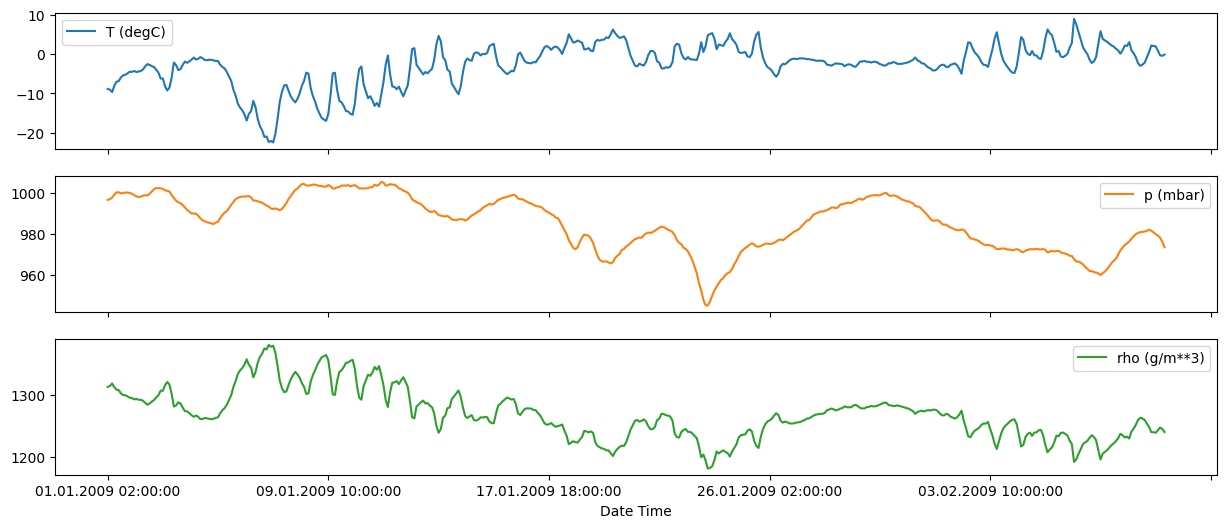

In [10]:

    
# Plot the data
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols][:480]
plot_features.index = df['Date Time'][:480]
_ = plot_features.plot(subplots=True)






In [11]:
# plot using plotly

import plotly.express as px

fig = px.line(df, x='Date Time', y='rho (g/m**3)', title='Temperature vs Time')
fig.show()




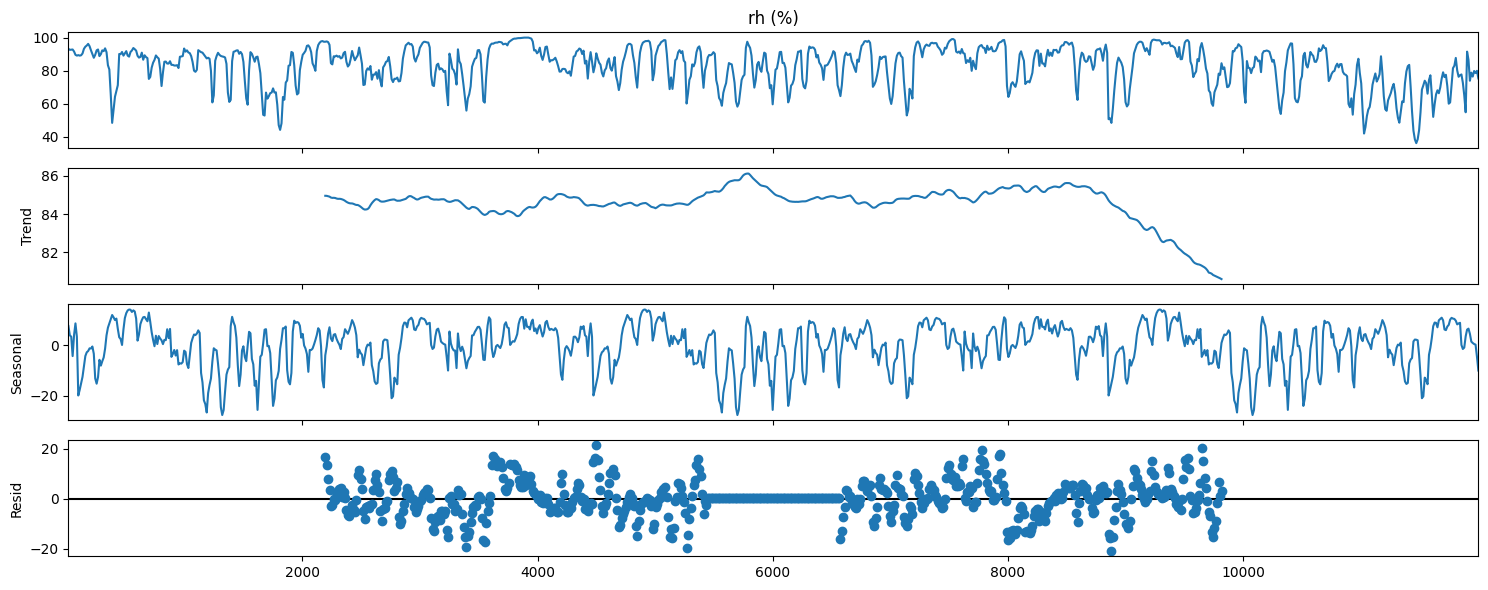

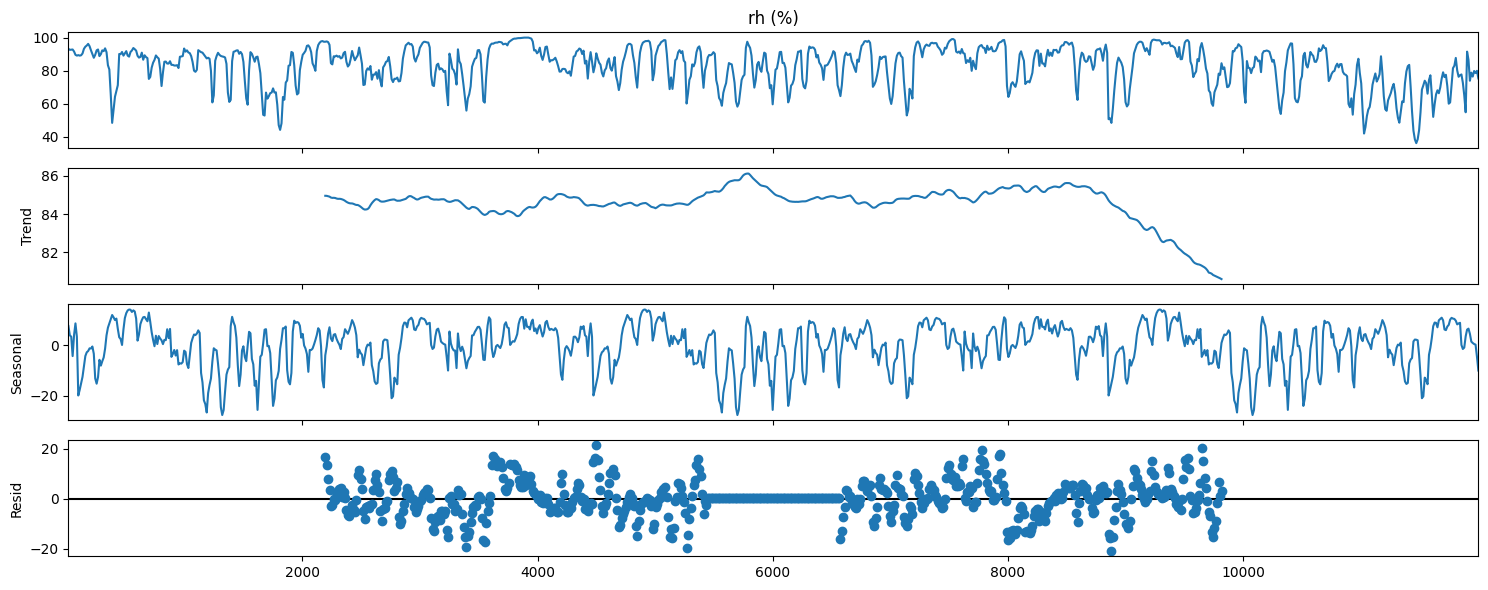

In [12]:
# lets decompose the data of first 480 rows

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['rh (%)'][:1000], model='additive', period=365)

result.plot()





In [13]:
# checking missing values

df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [14]:
# replacing the minus values with nan

df = df.replace(-9999.0, np.nan)

df.describe().transpose()


count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35043.0     2.128760   1.542249     0.00     0.99     1.76   
max. wv (m/s)    35043.0     3.532834   2.343747     0.00     1.76     2.97   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                      75%      max  
p (mbar)          994.720  1015.16  
T (degC)           15.490    37.28  
Tpot (K)          289.550   311.21  
Tdew (degC)        10.080    22.19  
rh (%)             89.500   100.00  
VPmax (mbar)       17.620    63.77  
VPact (mbar)       12.360    26.79  
VPdef (mbar)        5.300    46.01  
sh (g/kg)           7.810    17.13  
H2OC (mmol/mol)    12.490    27.25  
rho (g/m**3)     1242.800  1391.41  
wv (m/s)            2.845    13.50  
max. wv (m/s)       4.730    23.50  
wd (deg)          233.600   360.00

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

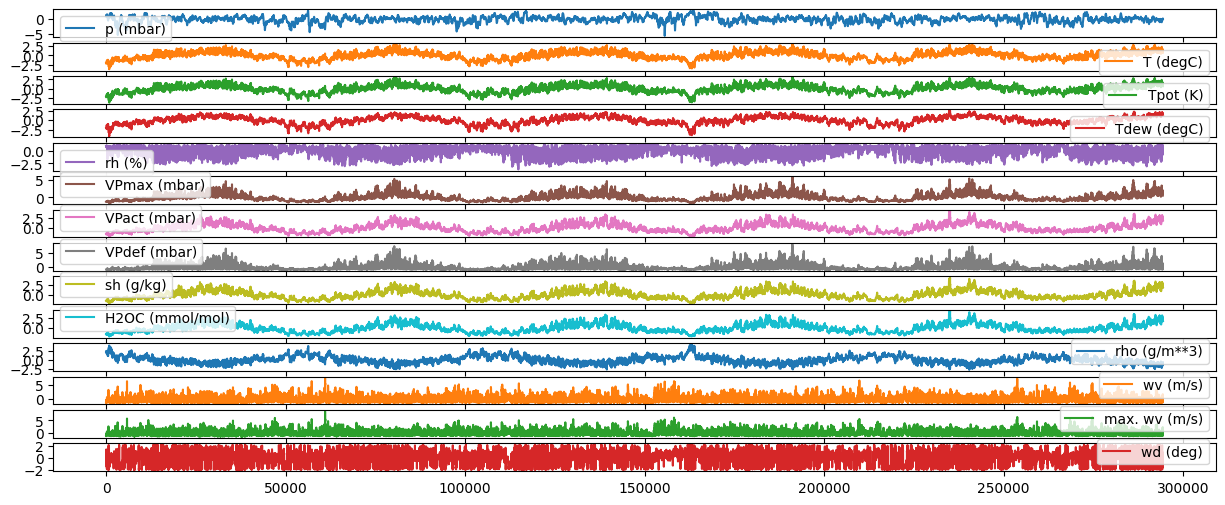

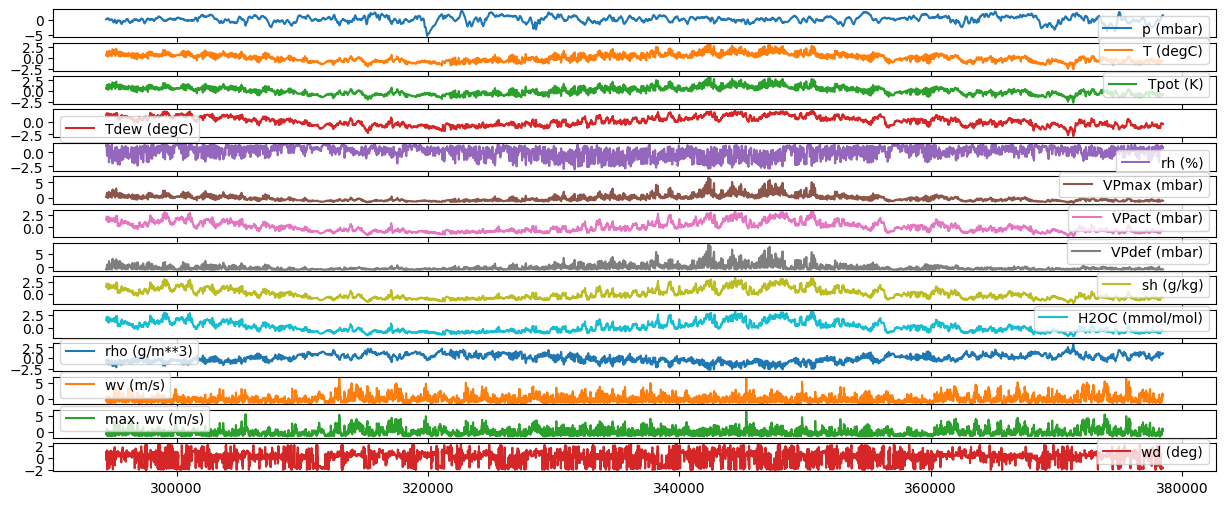

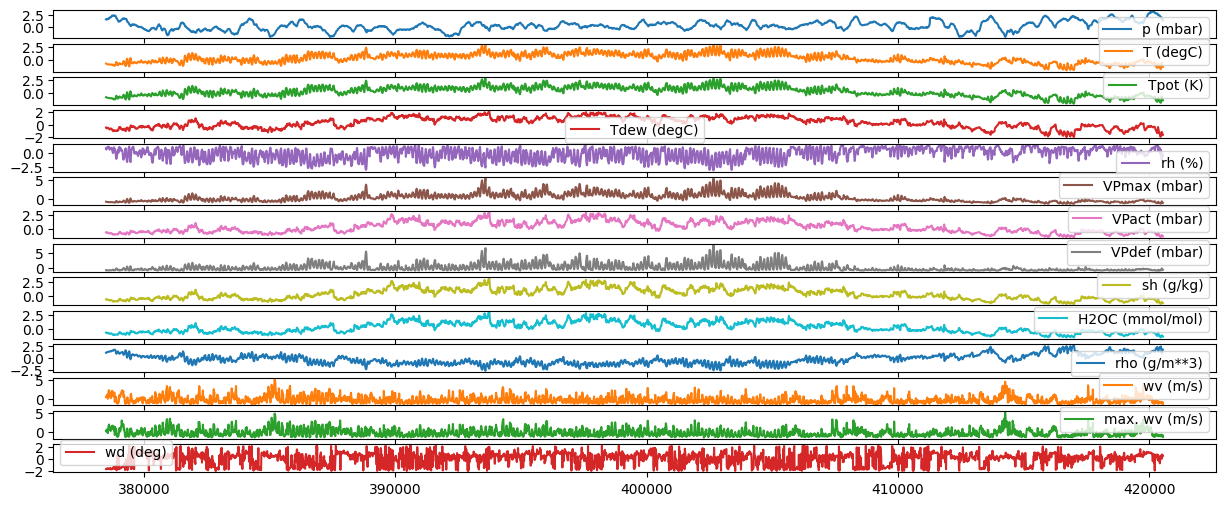

In [15]:
# splitting the data into train and test and validation

# setting date time index

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

# normalizing the data using library

numerical_cols = df.select_dtypes(include=['number']).columns

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


# plotting the line plot of the data

train_df.plot(subplots=True)
val_df.plot(subplots=True)
test_df.plot(subplots=True)











In [16]:
# create windowed dataset

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                           enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']
All shapes are: (batch, time, features)
Window shape: (3, 7, 14)
Inputs shape: (3, 6, 14)
labels shape: (3, 1, 1)


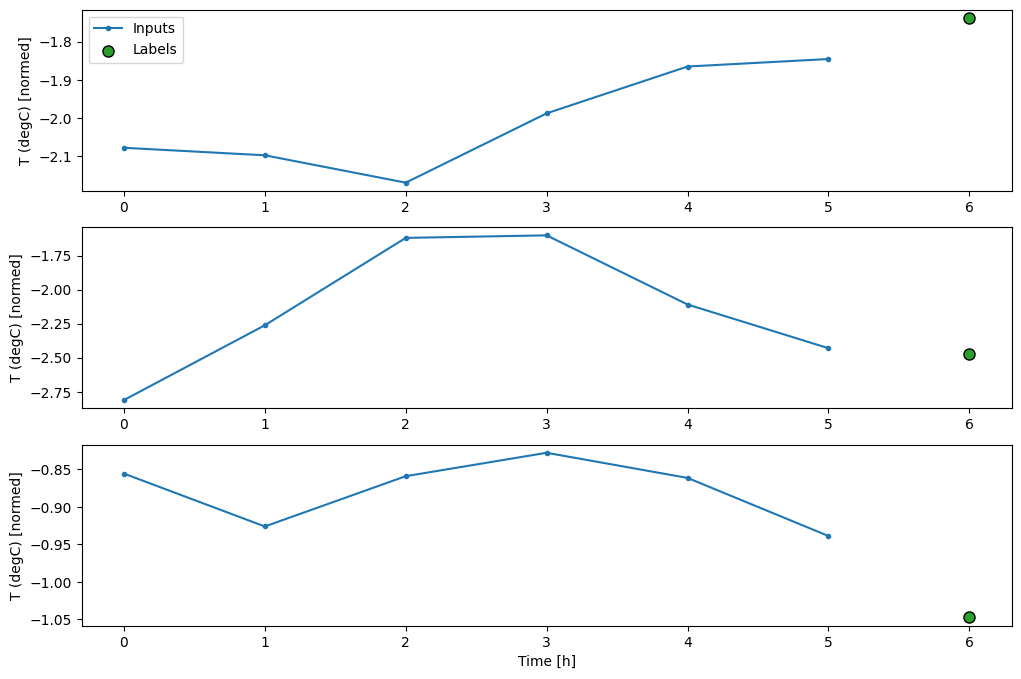

In [17]:
# function to split the window

w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                        label_columns=['T (degC)'])

print(w1)

w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                        label_columns=['T (degC)'])

w2


# function to plot the window

def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

# spliting the window

def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

# plot the window

# Stack three slices, the length of the total window:

example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                            np.array(train_df[100:100+w2.total_window_size]),
                            np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')

print(f'Window shape: {example_window.shape}')

print(f'Inputs shape: {example_inputs.shape}')

print(f'labels shape: {example_labels.shape}')

w2.example = example_inputs, example_labels

w2.plot()
















## Create tf.data.Datasets

In [18]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [19]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

## Single step models

In [20]:
# create  a baseline using class

class Baseline(tf.keras.Model):

    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]
    
# instantiate the class

baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                    metrics=[tf.metrics.MeanAbsoluteError()])
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val,return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0,return_dict=True)






NameError: name 'column_indices' is not defined

Input shape: (32, 24, 14)
Output shape: (32, 24, 1)


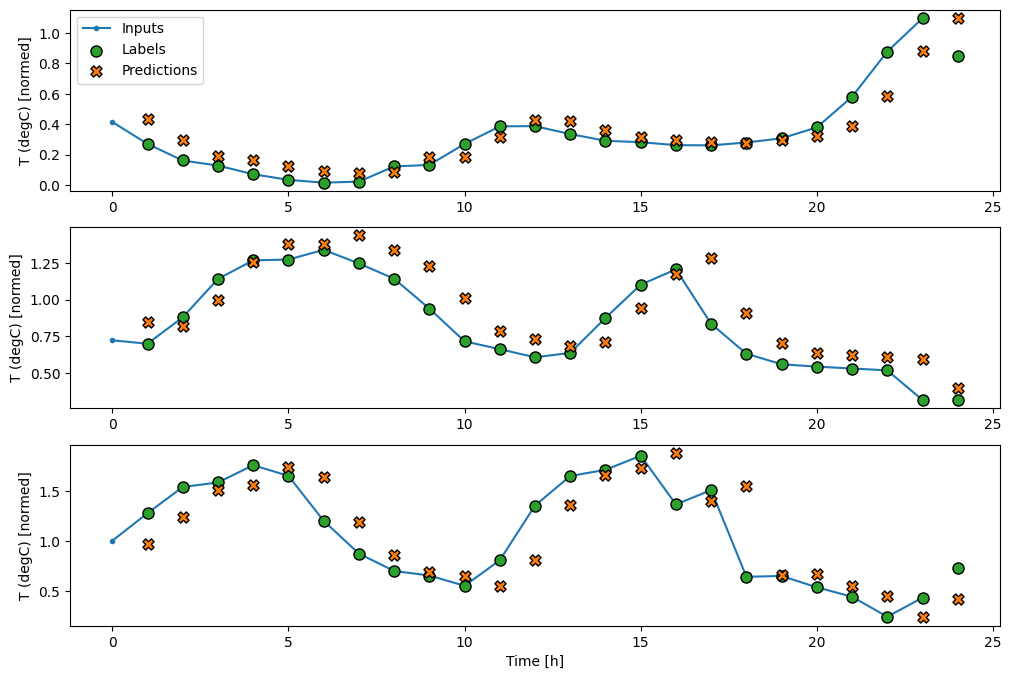

In [ ]:
# plot the baseline

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

wide_window.plot(baseline)



Input shape: (32, 1, 14)
Output shape: (32, 1, 1)
Epoch 1/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1762 - mean_absolute_error: 0.3089 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0503 - mean_absolute_error: 0.1676 - val_loss: nan - val_mean_absolute_error: nan
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mean_absolute_error: nan
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0442 - mean_absolute_error: 0.1587


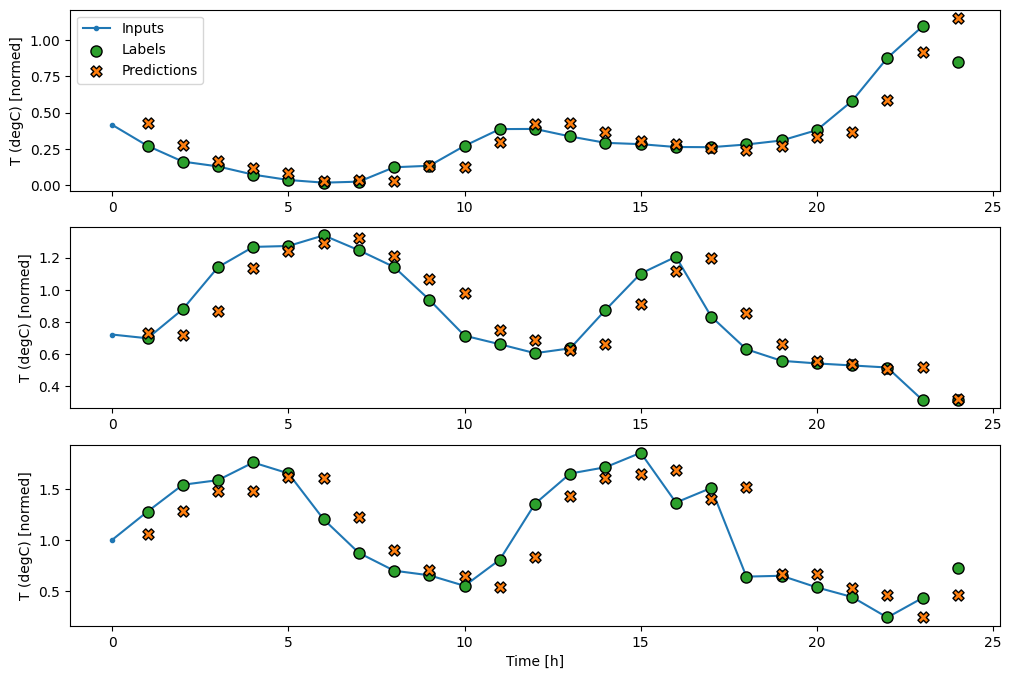

In [ ]:
# create a linear model

linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                    optimizer=tf.optimizers.Adam(),
                    metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history


history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, return_dict=True)

wide_window.plot(linear)



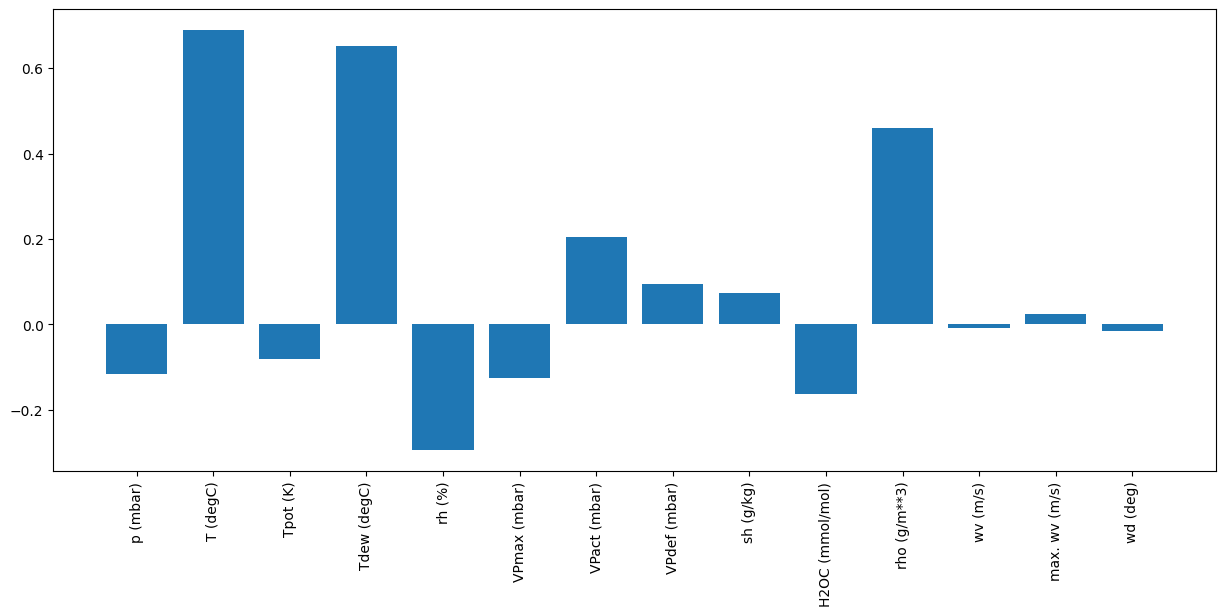

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

Epoch 1/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0834 - mean_absolute_error: 0.1916 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0386 - mean_absolute_error: 0.1465 - val_loss: nan - val_mean_absolute_error: nan
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mean_absolute_error: nan
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.1636


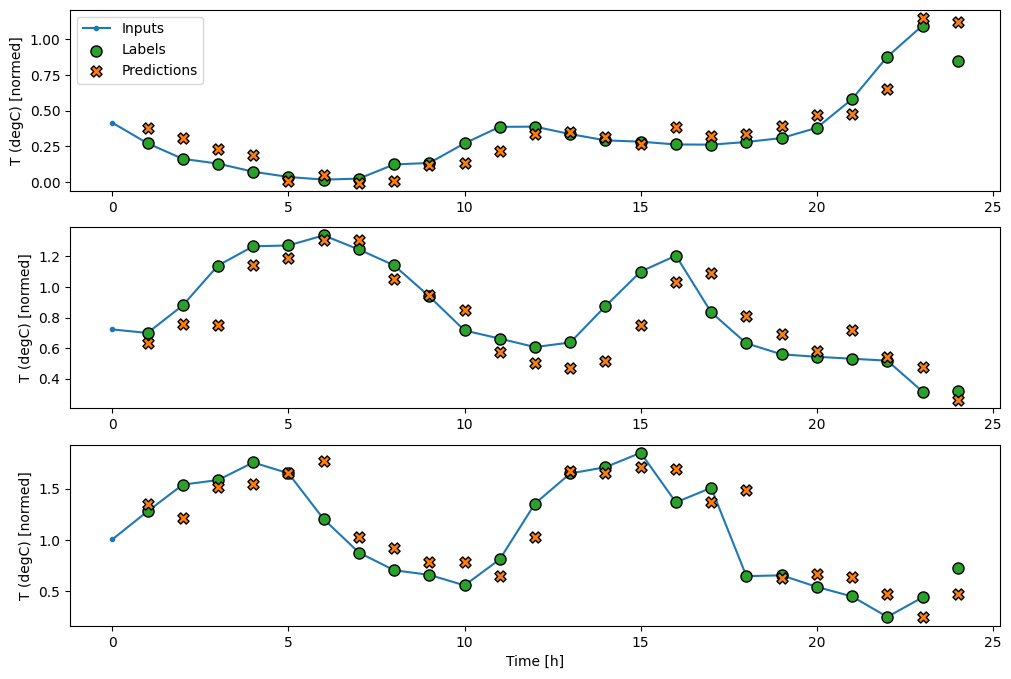

In [ ]:
# create a dense model

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)

performance['Dense'] = dense.evaluate(single_step_window.test, return_dict=True)

wide_window.plot(dense)



Input shape: (32, 3, 14)
Output shape: (32, 1, 1)
Epoch 1/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1252 - mean_absolute_error: 0.2242 - val_loss: 0.0297 - val_mean_absolute_error: 0.1282
Epoch 2/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0284 - mean_absolute_error: 0.1246 - val_loss: 0.0264 - val_mean_absolute_error: 0.1214
Epoch 3/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0257 - mean_absolute_error: 0.1183 - val_loss: 0.0248 - val_mean_absolute_error: 0.1141
Epoch 4/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0246 - mean_absolute_error: 0.1150 - val_loss: 0.0237 - val_mean_absolute_error: 0.1100
Epoch 5/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0238 - mean_absolute_error: 0.1128 - val_loss: 0.0243 - val_mean_absolute_error: 0.1132
Epoch 6/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0236 - mean_absolute_error: 0.1123 - val_loss: 0.0240 - val_mean_absolute_error: 0.1116
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0

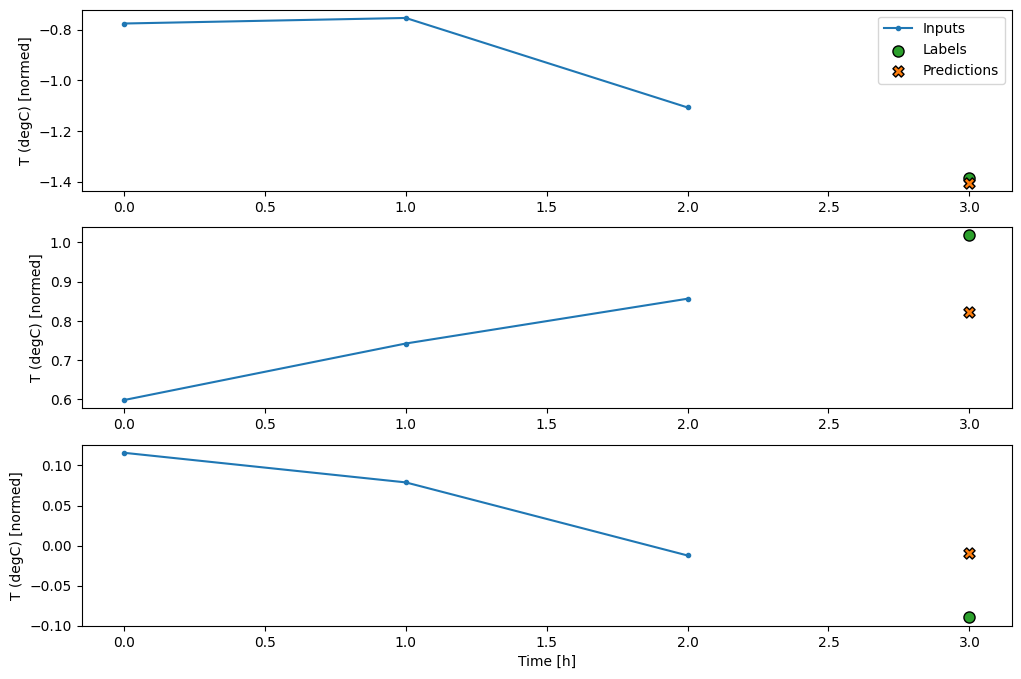

In [ ]:
# create a multi dense model

CONV_WIDTH = 3

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

print('Input shape:', conv_window.example[0].shape)

print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

history = compile_and_fit(multi_step_dense, conv_window)

#IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

conv_window.plot(multi_step_dense)




Epoch 1/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2123 - mean_absolute_error: 0.2681 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0285 - mean_absolute_error: 0.1248 - val_loss: nan - val_mean_absolute_error: nan
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mean_absolute_error: nan
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - mean_absolute_error: 0.1245
Input shape: (32, 3, 14)
Output shape: (32, 1, 1)


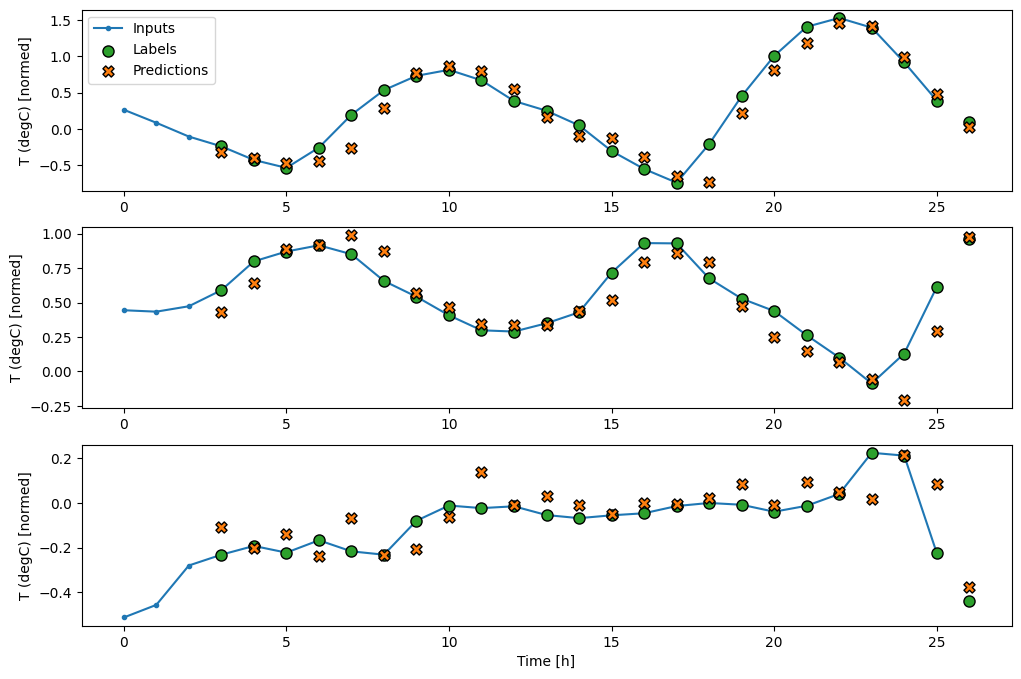

In [ ]:
# create a convolutional model

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)

performance['Conv'] = conv_model.evaluate(conv_window.test, return_dict=True)

print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

wide_conv_window.plot(conv_model)

Epoch 1/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.1369 - mean_absolute_error: 0.2464 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
766/766 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0233 - mean_absolute_error: 0.1104 - val_loss: nan - val_mean_absolute_error: nan
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mean_absolute_error: nan
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.1042


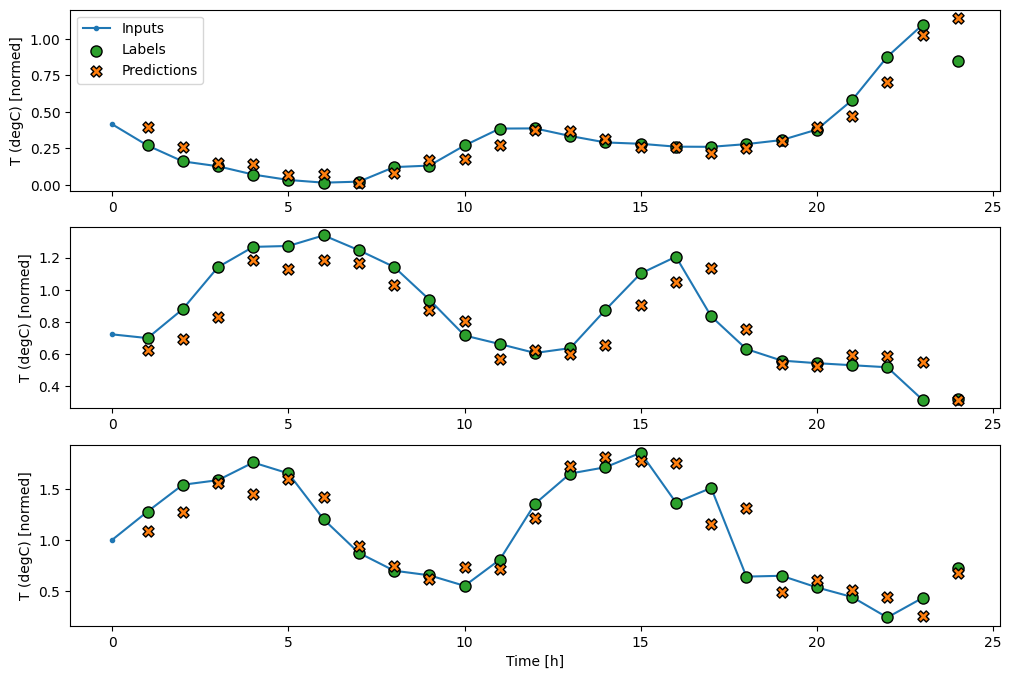

In [ ]:
# create a recurrent model

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)

performance['LSTM'] = lstm_model.evaluate(wide_window.test, return_dict=True)

wide_window.plot(lstm_model)

# create a autoregressive model

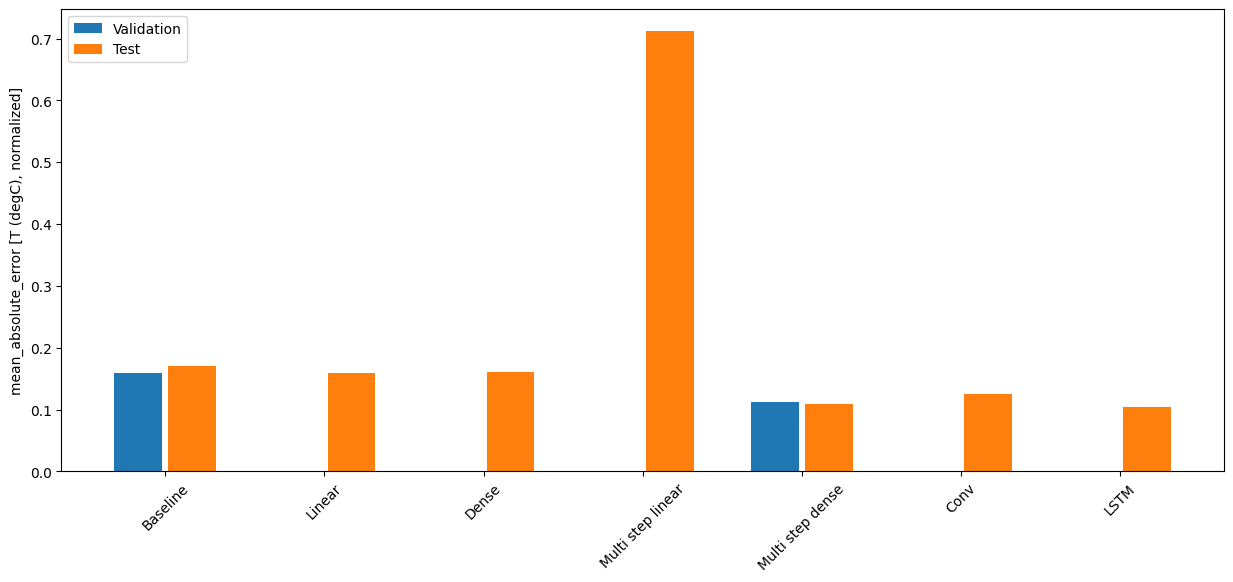

In [ ]:
# checking performance

cm = lstm_model.metrics[1]
cm.metrics

val_performance

x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()





In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 0.1710
Linear      : 0.1599
Dense       : 0.1612
Multi step linear: 0.7116
Multi step dense: 0.1096
Conv        : 0.1258
LSTM        : 0.1040


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

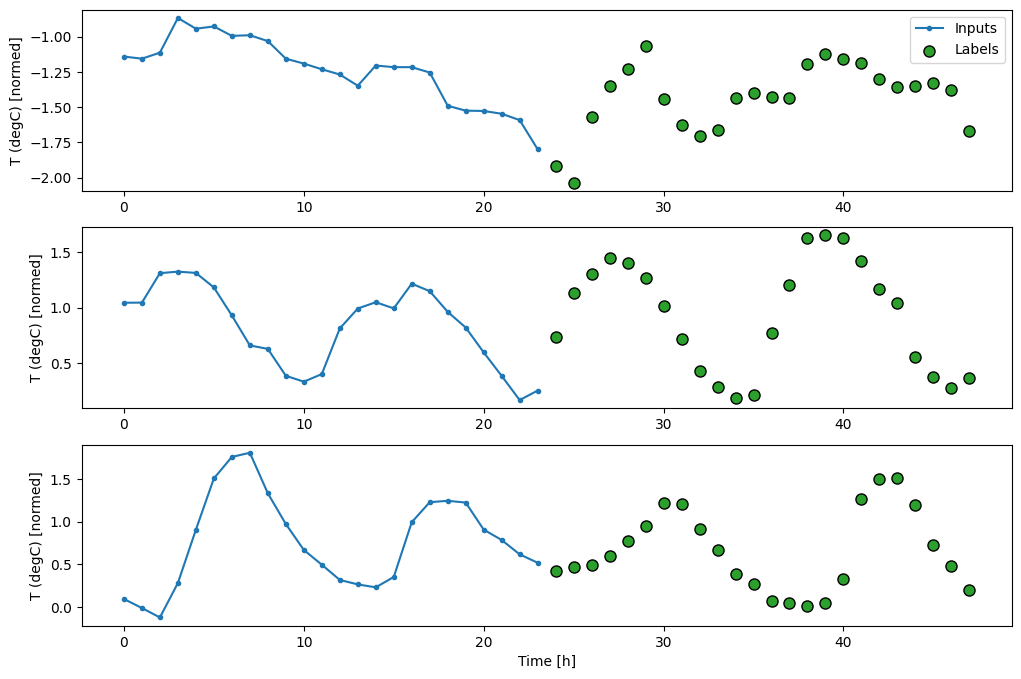

In [21]:
# multi step models

OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mean_absolute_error: nan


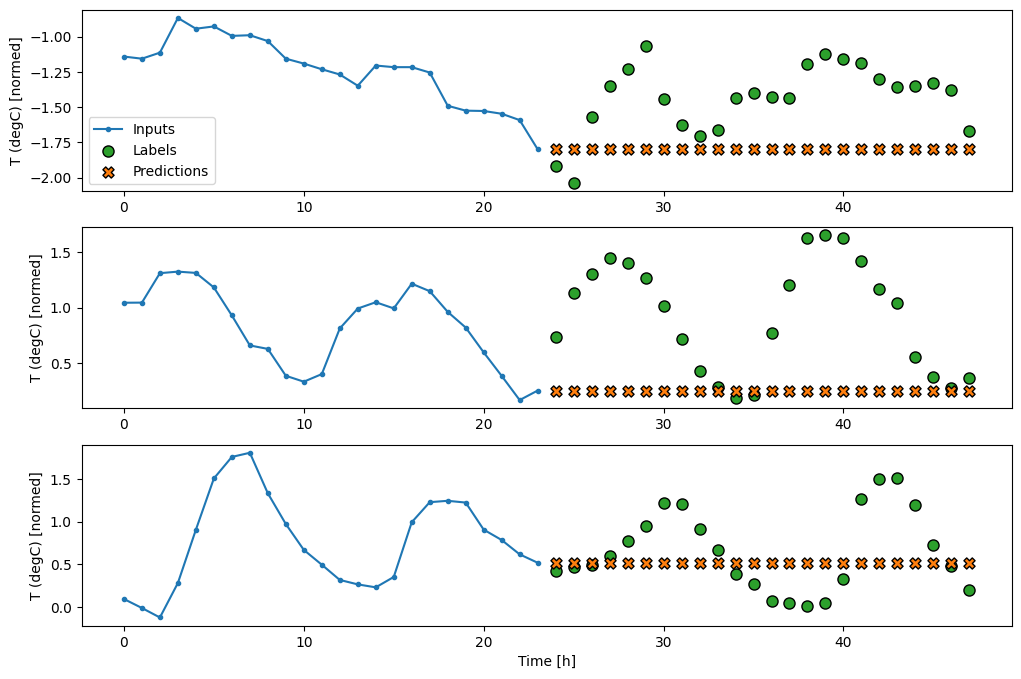

In [22]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(last_baseline)

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mean_absolute_error: nan


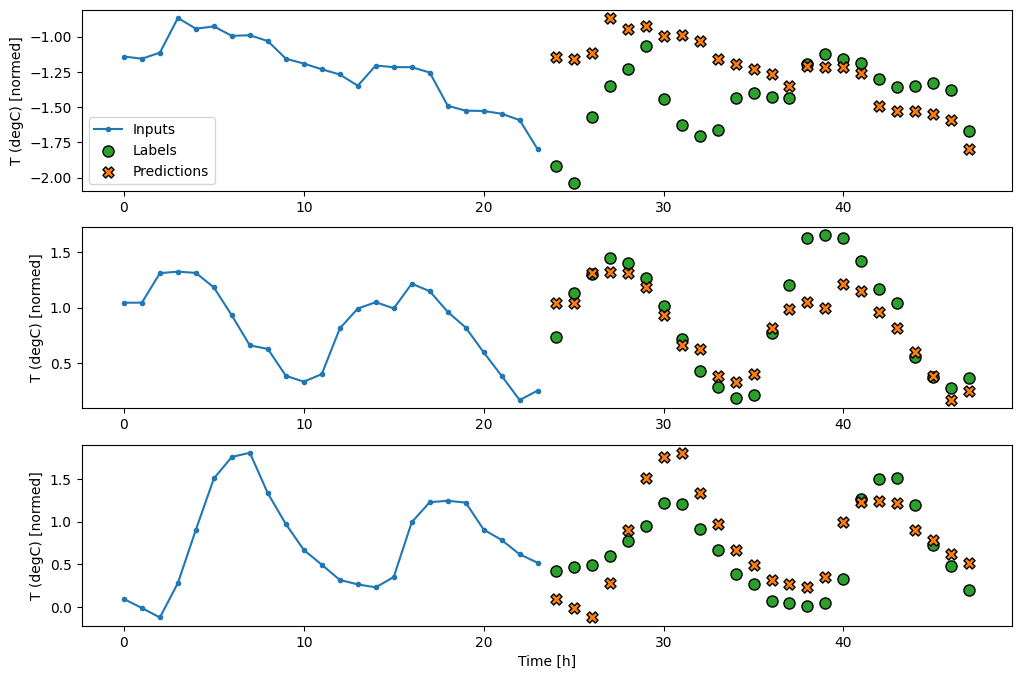

In [24]:


class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val, return_dict=True)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(repeat_baseline)

Epoch 1/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4601 - mean_absolute_error: 0.4866 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4592 - mean_absolute_error: 0.4855 - val_loss: nan - val_mean_absolute_error: nan
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mean_absolute_error: nan


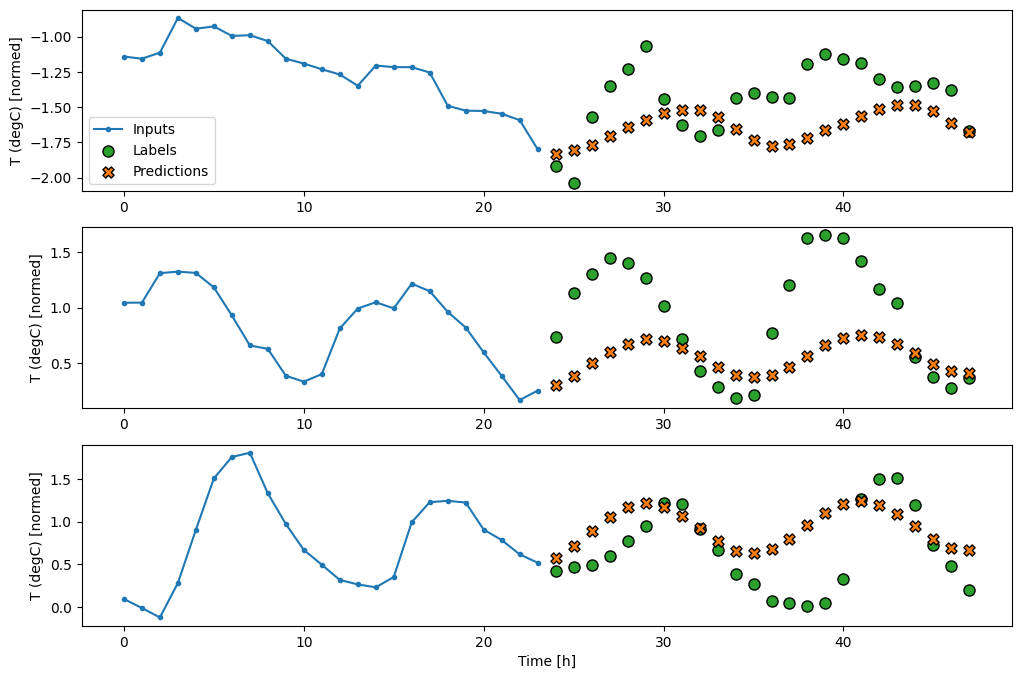

In [29]:
# single shot models

MAX_EPOCHS=24   
def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')
    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=[tf.metrics.MeanAbsoluteError()])
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

history = compile_and_fit(multi_linear_model, multi_window)

#IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_linear_model)

Epoch 1/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.4927 - mean_absolute_error: 0.5069 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.4394 - mean_absolute_error: 0.4717 - val_loss: nan - val_mean_absolute_error: nan
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mean_absolute_error: nan


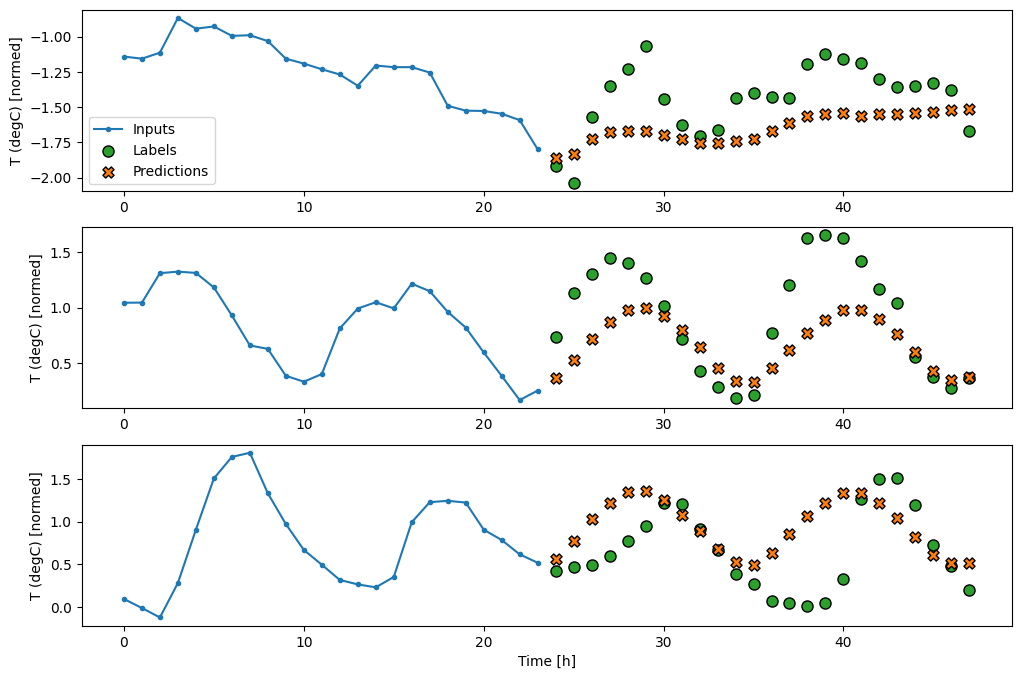

In [31]:
# dense model

multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

#IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_dense_model)


Epoch 1/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.4741 - mean_absolute_error: 0.4969 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.4014 - mean_absolute_error: 0.4477 - val_loss: nan - val_mean_absolute_error: nan
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - mean_absolute_error: nan


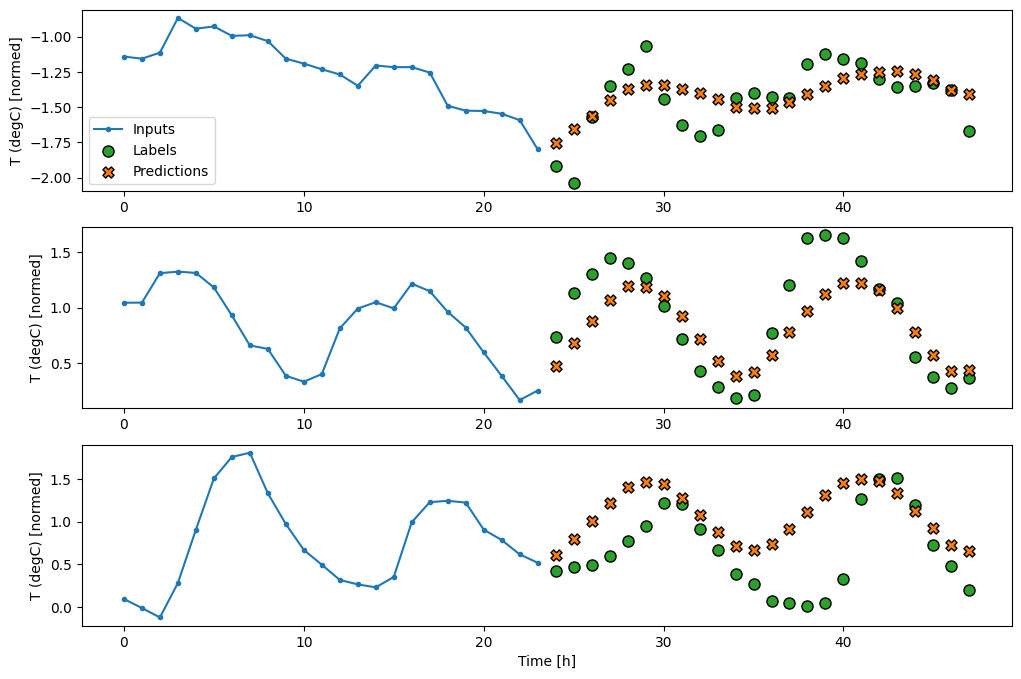

In [33]:
# convolutional model

CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

#IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_conv_model)

Epoch 1/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.5738 - mean_absolute_error: 0.5561 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/24
766/766 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.3676 - mean_absolute_error: 0.4262 - val_loss: nan - val_mean_absolute_error: nan
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: nan - mean_absolute_error: nan


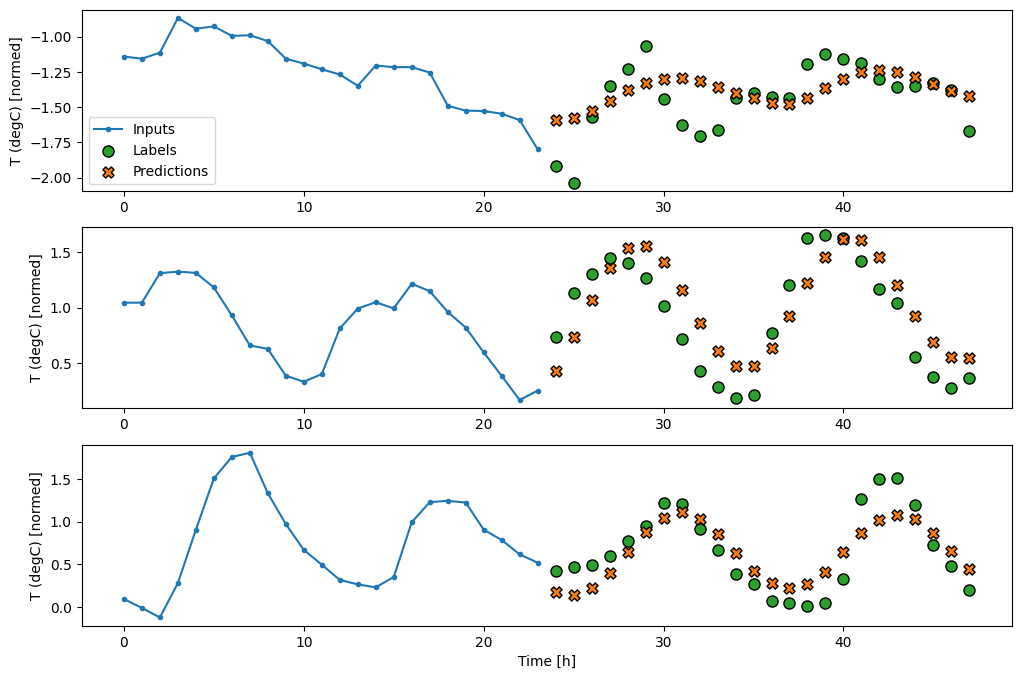

In [35]:
# RNN model

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

#Python.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)
multi_window.plot(multi_lstm_model)